In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [16]:
full_df=pd.read_csv('./data/drug_consumption.csv',index_col=0)

In [17]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1885 entries, 1 to 1888
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        1885 non-null   float64
 1   Gender     1885 non-null   float64
 2   Education  1885 non-null   float64
 3   Country    1885 non-null   float64
 4   Ethnicity  1885 non-null   float64
 5   Nscore     1885 non-null   float64
 6   Escore     1885 non-null   float64
 7   Oscore     1885 non-null   float64
 8   Ascore     1885 non-null   float64
 9   Cscore     1885 non-null   float64
 10  Impulsive  1885 non-null   float64
 11  SS         1885 non-null   float64
 12  Alcohol    1885 non-null   object 
 13  Amphet     1885 non-null   object 
 14  Amyl       1885 non-null   object 
 15  Benzos     1885 non-null   object 
 16  Caff       1885 non-null   object 
 17  Cannabis   1885 non-null   object 
 18  Choc       1885 non-null   object 
 19  Coke       1885 non-null   object 
 20  Crack      18

In [18]:
full_df.sample(10)

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
ID,,,,,,,,,,,,,,,,,,,,,
409,0.49788,-0.48246,-1.43719,0.96082,0.11440,1.37297,-0.15487,-0.31776,-0.30172,-0.65253,...,CL2,CL0,CL0,CL0,CL1,CL0,CL1,CL6,CL0,CL0
605,-0.07854,-0.48246,0.45468,-0.57009,-0.31685,-0.67825,-0.80615,-0.45174,-1.47955,0.12331,...,CL2,CL0,CL2,CL2,CL3,CL0,CL3,CL5,CL0,CL2
274,-0.07854,0.48246,0.45468,0.96082,-0.31685,0.22393,0.16767,-1.11902,0.28783,0.25953,...,CL2,CL0,CL2,CL3,CL2,CL0,CL1,CL4,CL0,CL0
1529,-0.95197,0.48246,0.45468,0.96082,-0.31685,-1.86962,1.93886,0.58331,-1.47955,0.12331,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
1289,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-0.05188,0.96248,-0.01928,-1.07533,-0.40581,...,CL5,CL0,CL0,CL3,CL5,CL0,CL3,CL6,CL0,CL0
917,-0.07854,0.48246,-1.43719,-0.57009,-0.31685,2.28554,-2.53830,-0.58331,-2.21844,-3.15735,...,CL1,CL0,CL0,CL2,CL0,CL5,CL1,CL6,CL0,CL0
920,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,1.72012,-1.63340,-0.17779,1.61108,0.41594,...,CL0,CL0,CL0,CL5,CL0,CL0,CL0,CL3,CL0,CL0
1626,0.49788,0.48246,-0.05921,0.96082,-0.31685,-0.79151,0.32197,-1.27553,0.76096,0.75830,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
1421,-0.07854,-0.48246,-0.61113,-0.57009,-0.31685,0.82562,-0.43999,0.58331,-0.76096,-0.52745,...,CL4,CL0,CL0,CL0,CL3,CL0,CL4,CL0,CL0,CL0


In [19]:
full_df.isnull().sum()


Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64

In [20]:
full_df.describe()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [22]:
numerical_features = ['Age','Gender','Education','Country','Ethnicity','Nscore','Escore','Oscore','Ascore','Cscore','Impulsive','SS']
categorical_features = ['Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis','Choc','Coke','Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms','Nicotine','Semer','VSA']

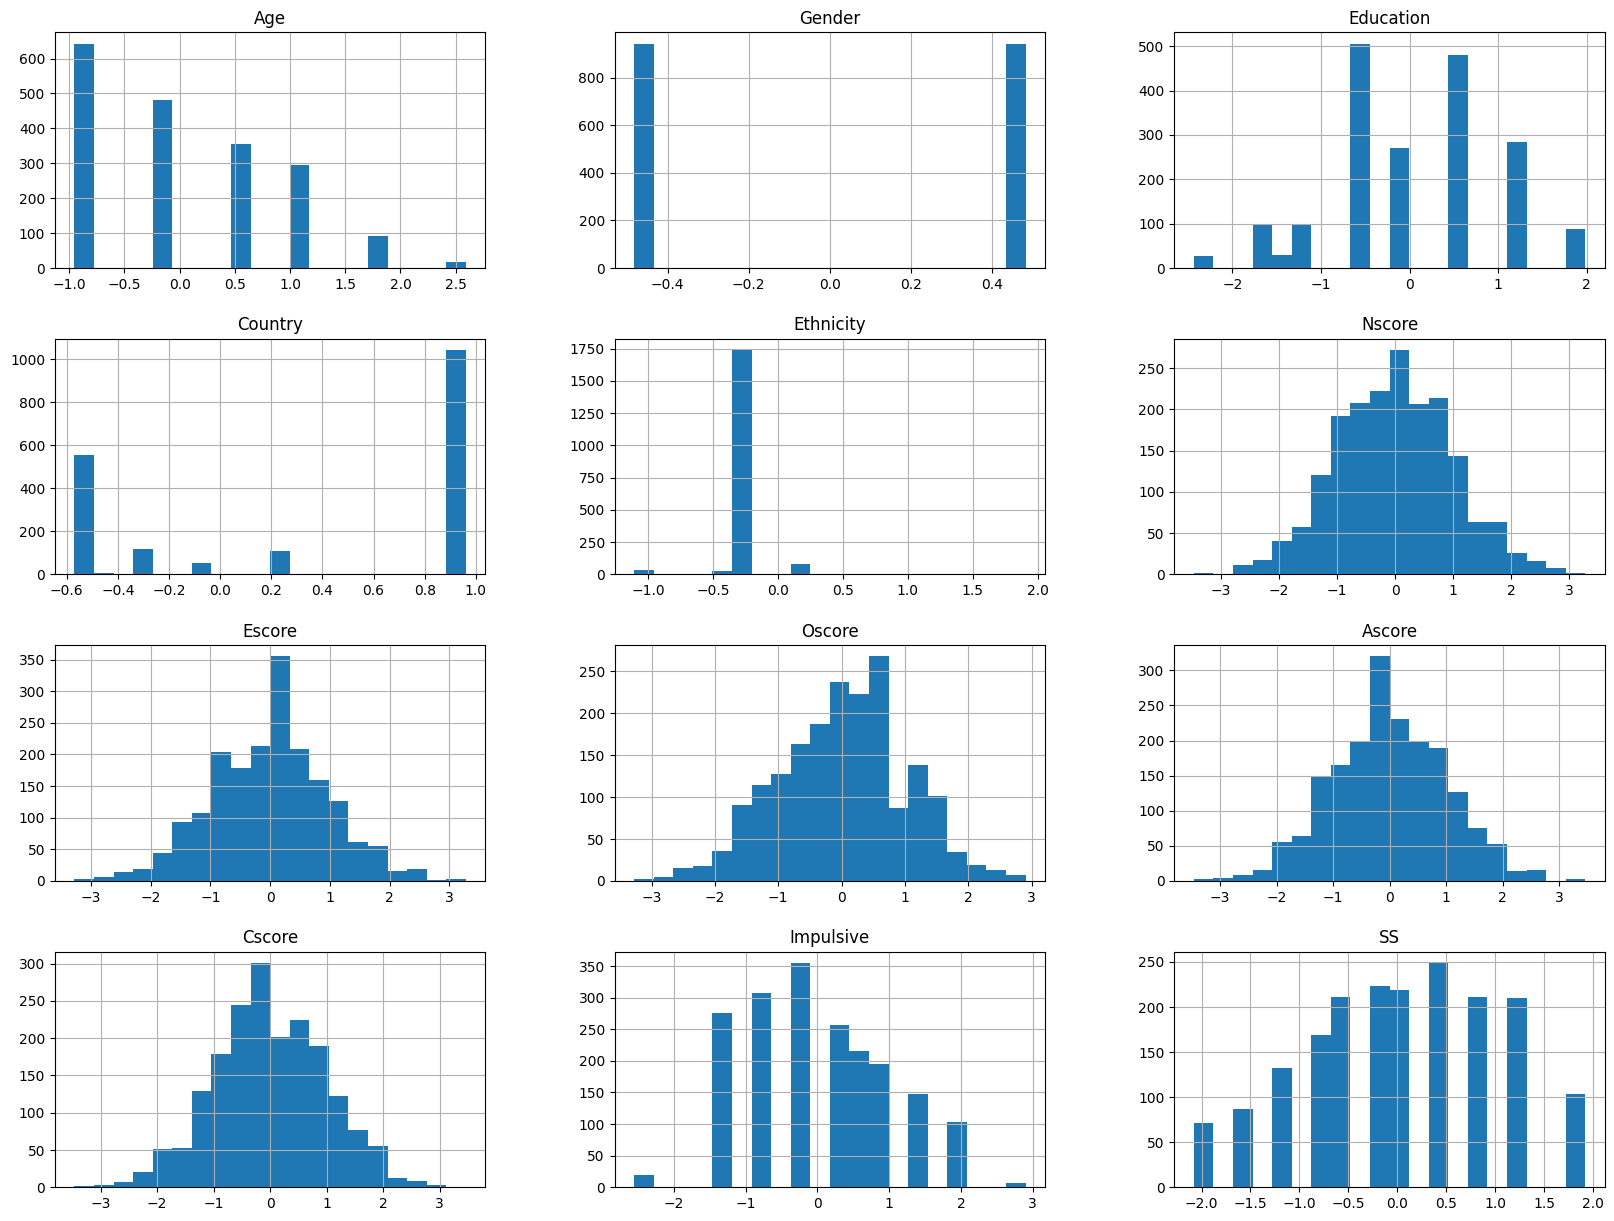

In [23]:
# plot histograms for numerical features
full_df[numerical_features].hist(bins=20, figsize=(20,15))
plt.show()

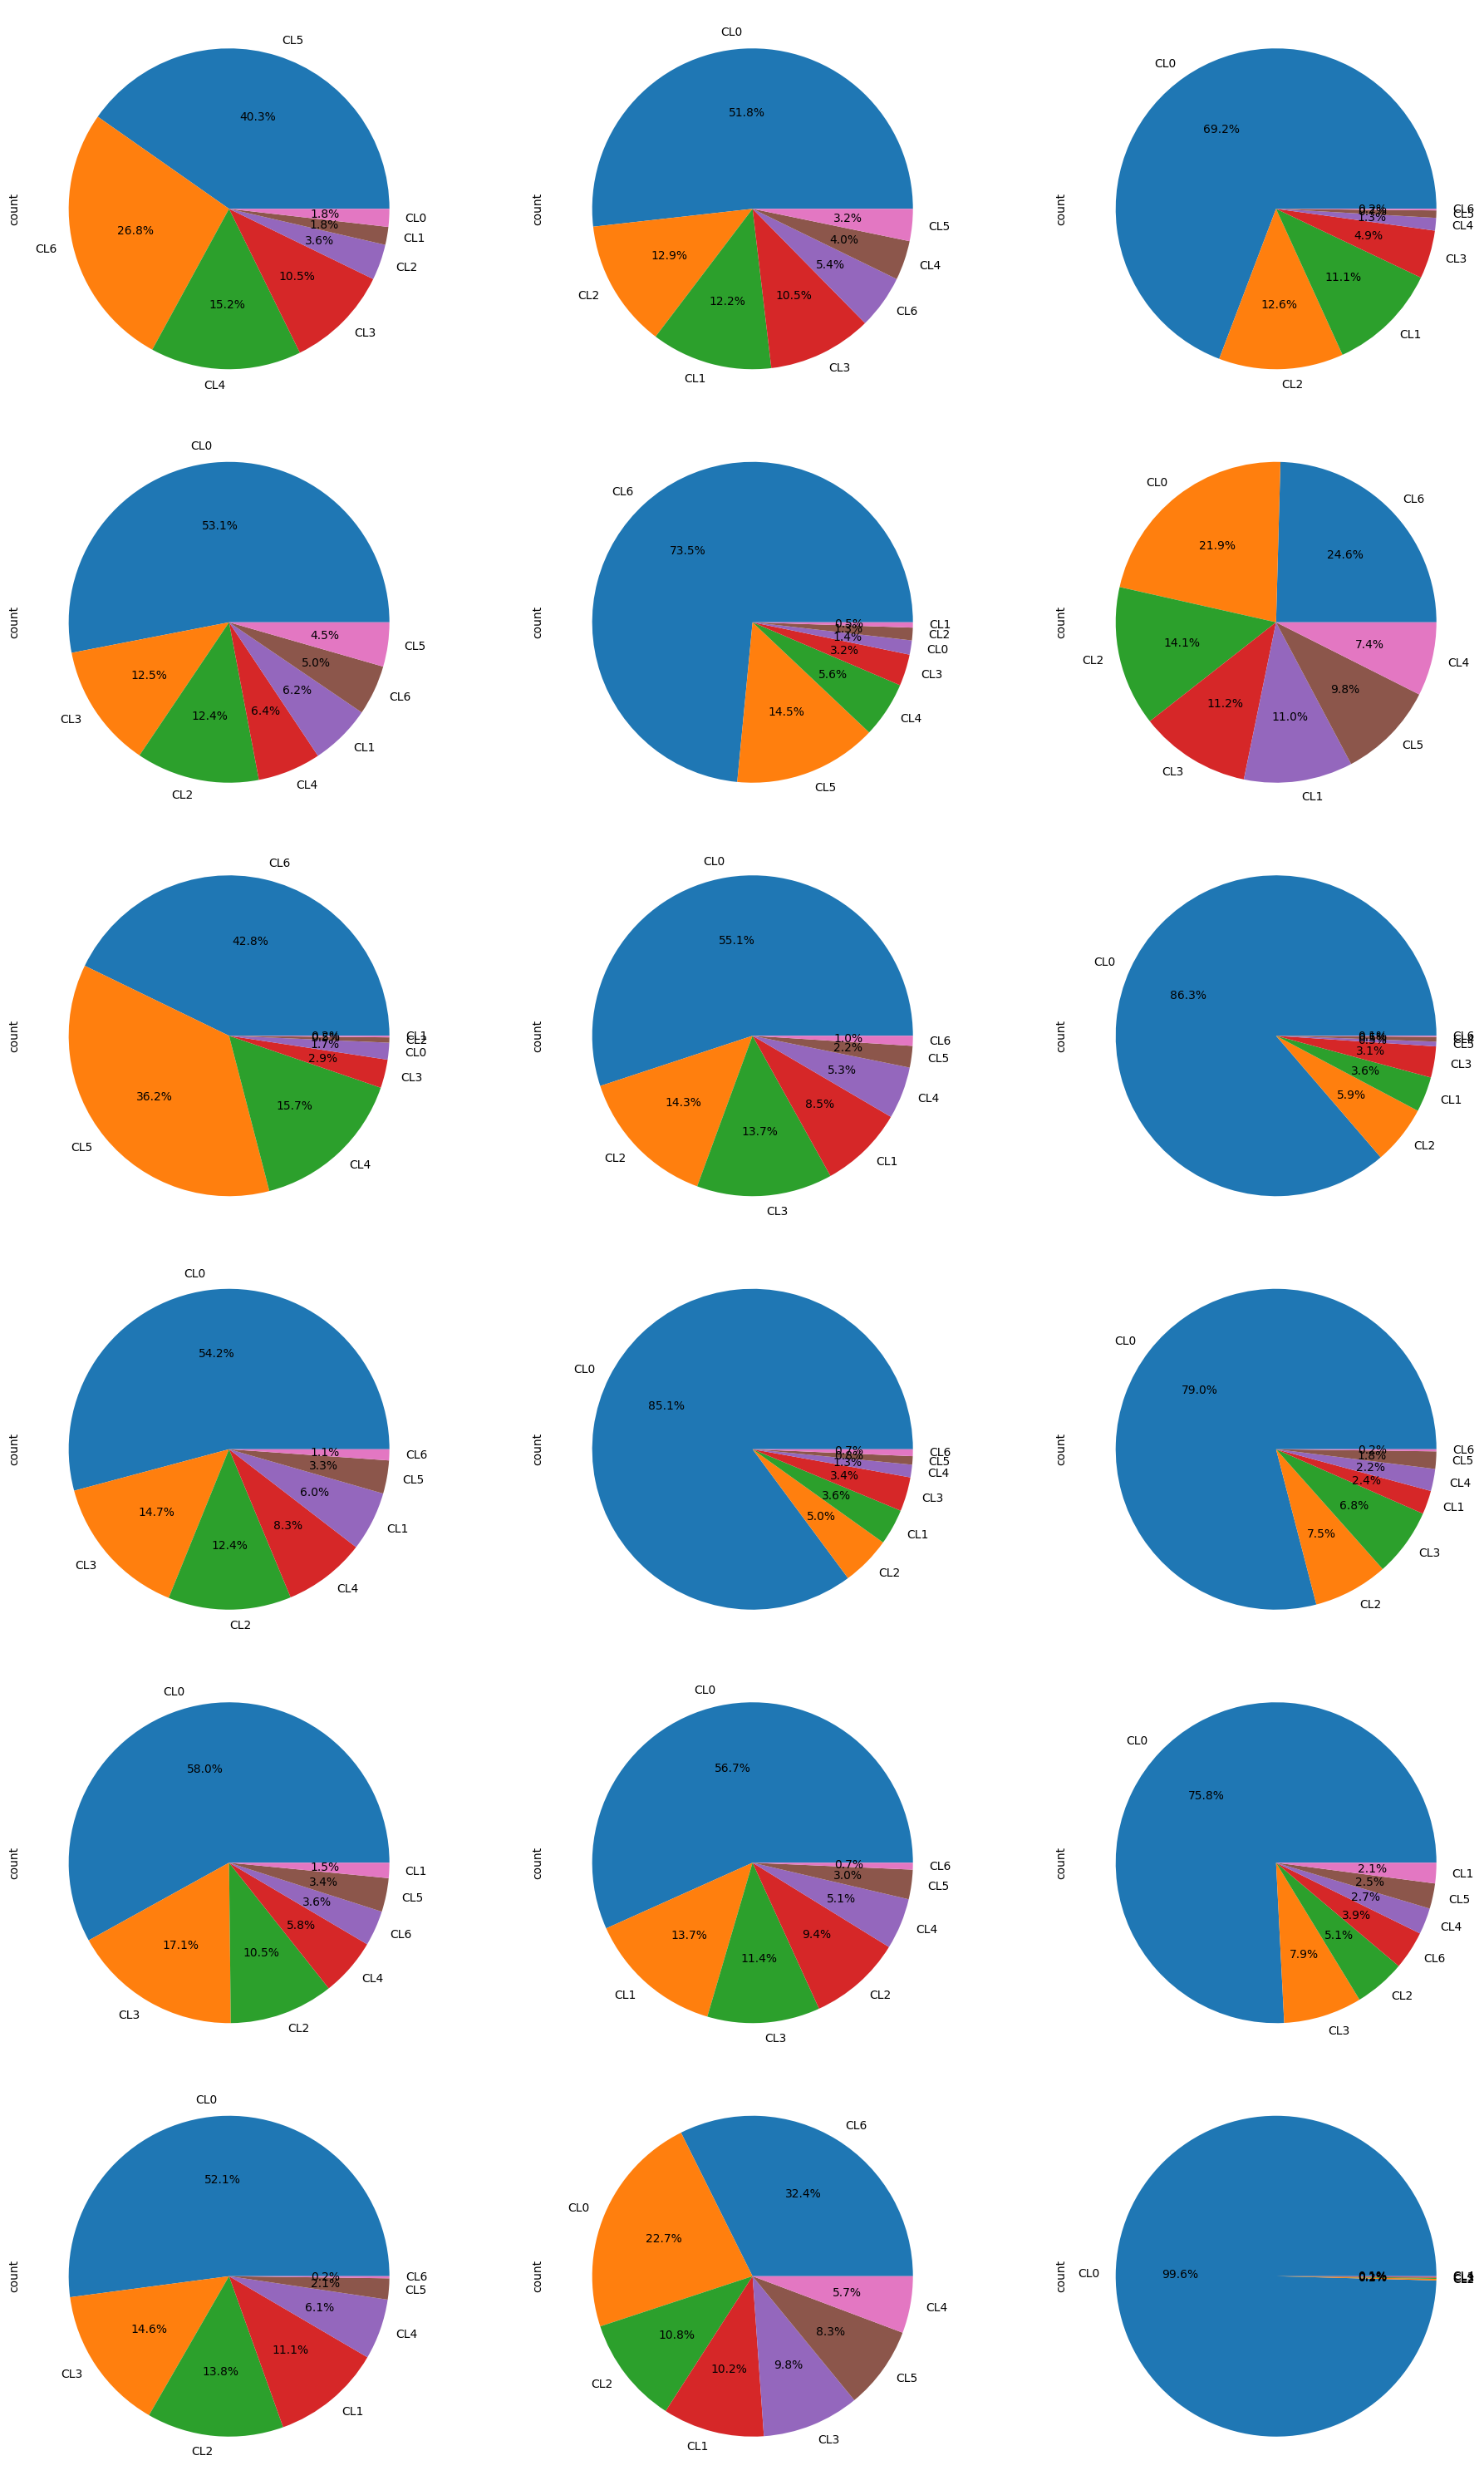

In [31]:
# plot pie charts for categorical features with common legend and using seaborn
fig, axes = plt.subplots(6, 3, figsize=(20, 30))
for i, ax in enumerate(axes.flatten()):
    if i < len(categorical_features):
        # plot a pie chart
        full_df[categorical_features[i]].value_counts().plot.pie(autopct='%1.1f%%', ax=ax)
plt.tight_layout()
plt.show()

In [34]:
full_df['Alcohol'].value_counts()

Alcohol
CL5    759
CL6    505
CL4    287
CL3    198
CL2     68
CL1     34
CL0     34
Name: count, dtype: int64